In [4]:
from scipy import stats
import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
monte_carlo_on = [43.13, 43.19, 43.19, 43.13, 43.22, 43.23, 43.21, 43.29, 43.22, 43.15]
monte_carlo_off = [43.25, 43.22, 43.17, 43.22, 43.25, 43.23, 43.20, 43.23, 43.11, 43.21]
sarsa = [42.40, 42.42, 42.34, 42.44, 42.41, 42.46, 42.44, 42.40, 42.33, 42.26]
q_learning = [41.08, 41.06, 41.13, 41.08, 41.04, 41.05, 40.98, 41.12, 41.03, 41.06]
dyna_q = [42.63, 42.62, 42.64, 42.62, 42.64, 42.63, 42.68, 42.68, 42.62, 42.68]

In [5]:
print(np.std(monte_carlo_on))
print(np.std(monte_carlo_off))
print(np.std(sarsa))
print(np.std(q_learning))
print(np.std(dyna_q))

0.047159304490205375
0.03986226285598902
0.058651513194460686
0.04124318125460313
0.02457641145488933


In [6]:
print(np.mean(monte_carlo_on))
print(np.mean(monte_carlo_off))
print(np.mean(sarsa))
print(np.mean(q_learning))
print(np.mean(dyna_q))

43.19599999999999
43.208999999999996
42.39
41.063
42.644


In [7]:
anova_result = stats.f_oneway(monte_carlo_on, monte_carlo_off, sarsa, q_learning, dyna_q)
anova_result

F_onewayResult(statistic=3631.0042372879325, pvalue=7.760372775705814e-56)

In [26]:
values = monte_carlo_on + monte_carlo_off + sarsa + q_learning + dyna_q
labels = ['monte_carlo_on'] * len(monte_carlo_on) + ['monte_carlo_off'] * len(monte_carlo_off) + \
         ['sarsa'] * len(sarsa) + ['q_learning'] * len(q_learning) + ['dyna_q'] * len(dyna_q)
data = pd.DataFrame({'Group': labels, 'Value': values})

tukey = pairwise_tukeyhsd(endog=data['Value'], groups=data['Group'], alpha=0.05)

anova_result.pvalue, tukey.summary()

print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
         dyna_q monte_carlo_off    0.565   -0.0  0.5064  0.6236   True
         dyna_q  monte_carlo_on    0.552   -0.0  0.4934  0.6106   True
         dyna_q      q_learning   -1.581   -0.0 -1.6396 -1.5224   True
         dyna_q           sarsa   -0.254    0.0 -0.3126 -0.1954   True
monte_carlo_off  monte_carlo_on   -0.013 0.9693 -0.0716  0.0456  False
monte_carlo_off      q_learning   -2.146   -0.0 -2.2046 -2.0874   True
monte_carlo_off           sarsa   -0.819   -0.0 -0.8776 -0.7604   True
 monte_carlo_on      q_learning   -2.133   -0.0 -2.1916 -2.0744   True
 monte_carlo_on           sarsa   -0.806   -0.0 -0.8646 -0.7474   True
     q_learning           sarsa    1.327   -0.0  1.2684  1.3856   True
----------------------------------------------------------------------


In [5]:
file_paths = {
    'Dyna-Q': 'dynaq_stats.csv',
    'Monte Carlo Off-Policy': 'off_MC.csv',
    'Monte Carlo On-Policy': 'on_MC.csv',
    'Q-Learning': 'qlearning.csv',
    'SARSA': 'SARSA.csv'
    
}


dfs = {}
for algorithm, path in file_paths.items():
    dfs[algorithm] = pd.read_csv(path)

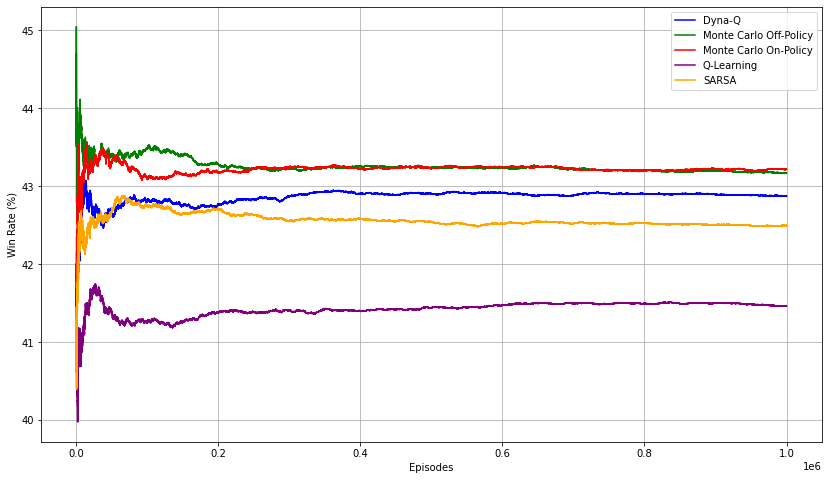

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange']
for (algorithm, df), color in zip(dfs.items(), colors):
    filtered_df = df[(df['Episode'] >= 800) & (df['Episode'] <= 1000000)]
    plt.plot(filtered_df['Episode'], filtered_df['WinRate'], label=algorithm, color=color)

plt.xlabel('Episodes')
plt.ylabel('Win Rate (%)')
plt.legend()
plt.grid(True)
# plt.savefig('Win Rates Algorithms (800-150000).png')
plt.show()